## Credit Card Fraud Detection
This project explores a real-world credit card transaction dataset to understand behavioral patterns of fraudulent vs non-fraudulent activity. The focus is on transaction amount and time-based behavior as a foundation for fraud detection modeling.

## Dataset Overview
The dataset contains credit card transactions labeled as non-fraudulent (Class = 0) or fraudulent (Class = 1). It consists of 284,807 transactions with 30 input features and one target variable. Source Kaggle. 

Most features (V1–V28) are the result of PCA-based anonymization, designed to protect sensitive user and transaction information while preserving underlying behavioral patterns. As a result, their exact meanings are unknown, but they remain informative for analytical and predictive purposes.

In addition to anonymized features, the dataset includes:

Time: seconds elapsed since the first transaction

Amount: transaction amount in euros

Class: fraud indicator (target variable)

### 

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [2]:
df = pd.read_csv ("/Users/admin/Downloads/credit_card_fraud/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Initial checks 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
for x in df.columns: # Check percentage of empty cells per column
    print(f"The percentage of empty cells in column {x} is {round(df[x].isna().sum()/len(df[x])*100,2)} %.")

The percentage of empty cells in column Time is 0.0 %.
The percentage of empty cells in column V1 is 0.0 %.
The percentage of empty cells in column V2 is 0.0 %.
The percentage of empty cells in column V3 is 0.0 %.
The percentage of empty cells in column V4 is 0.0 %.
The percentage of empty cells in column V5 is 0.0 %.
The percentage of empty cells in column V6 is 0.0 %.
The percentage of empty cells in column V7 is 0.0 %.
The percentage of empty cells in column V8 is 0.0 %.
The percentage of empty cells in column V9 is 0.0 %.
The percentage of empty cells in column V10 is 0.0 %.
The percentage of empty cells in column V11 is 0.0 %.
The percentage of empty cells in column V12 is 0.0 %.
The percentage of empty cells in column V13 is 0.0 %.
The percentage of empty cells in column V14 is 0.0 %.
The percentage of empty cells in column V15 is 0.0 %.
The percentage of empty cells in column V16 is 0.0 %.
The percentage of empty cells in column V17 is 0.0 %.
The percentage of empty cells in col

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

No Frauds 99.83 %
Frauds 0.17 %


### 

## Exploratory Data Analysis 

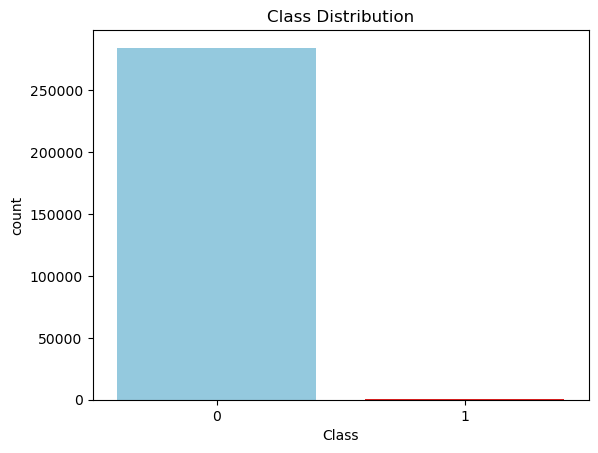

In [11]:
sns.countplot(x='Class', hue='Class', data=df, palette=["skyblue", "red"], legend=False)
plt.title("Class Distribution")
plt.show()

The dataset is highly imbalanced, with fraudulent transactions representing only a very small fraction of total activity. This reflects real-world payment systems, where fraud is rare but impactful.

###

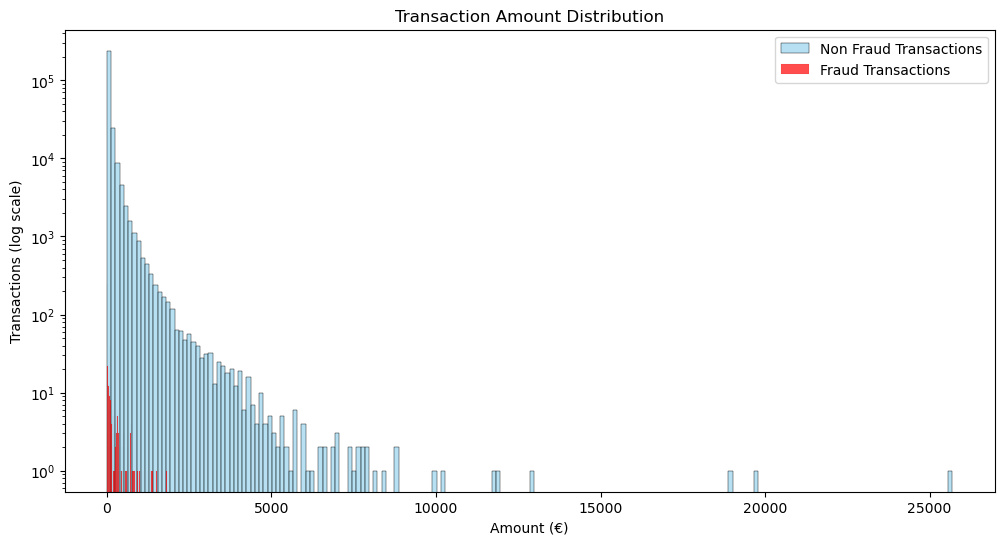

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df['Amount'], bins=200, color='skyblue', alpha=0.6, label='Non Fraud Transactions')
sns.histplot(df[df['Class']==1]['Amount'], bins=200, color='red', alpha=0.7, label='Fraud Transactions')
plt.yscale('log')  # <- log scale on y-axis
plt.xlabel("Amount (€)")
plt.ylabel("Transactions (log scale)")
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()

Most transactions occur at low amounts, with frequency decreasing as amounts increase. The highest-value transactions are mainly non-fraudulent, while fraudulent transactions are concentrated in low to mid-range amounts.

###

In [13]:
df['Hour'] = df['Time'].apply(lambda x: int( x // 3600 )) # Feature engineering
df = df.drop(columns=['Time'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47


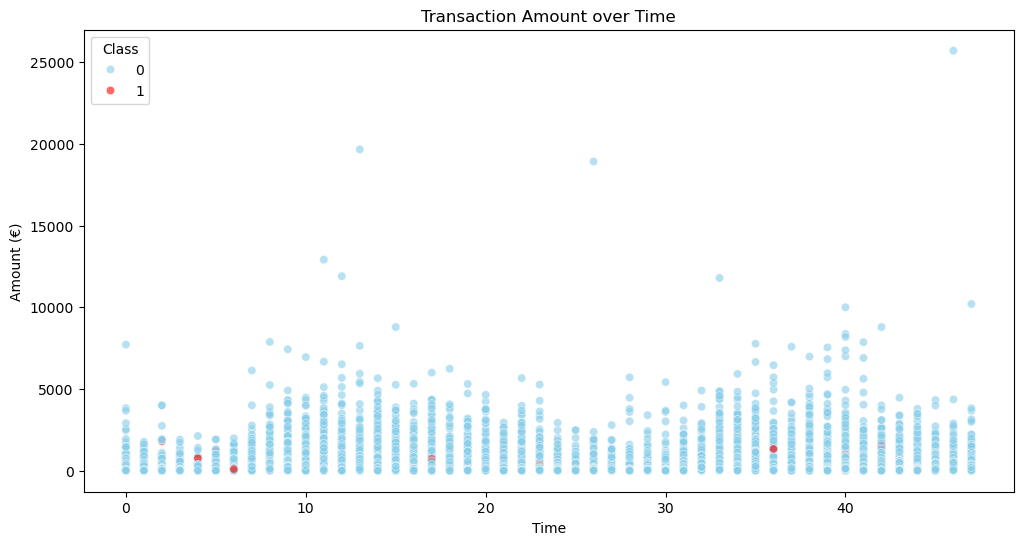

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Hour', y='Amount', data=df, hue='Class', palette={0:'skyblue', 1:'red'}, alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Amount (€)")
plt.title("Transaction Amount over Time")
plt.show()

Non-fraudulent transactions are continuously spread across the entire timeline, showing stable activity throughout the day, with occasional high-amount outliers representing large but legitimate transactions, while fraudulent transactions are less frequent and tend to cluster at specific hours and amounts.

###

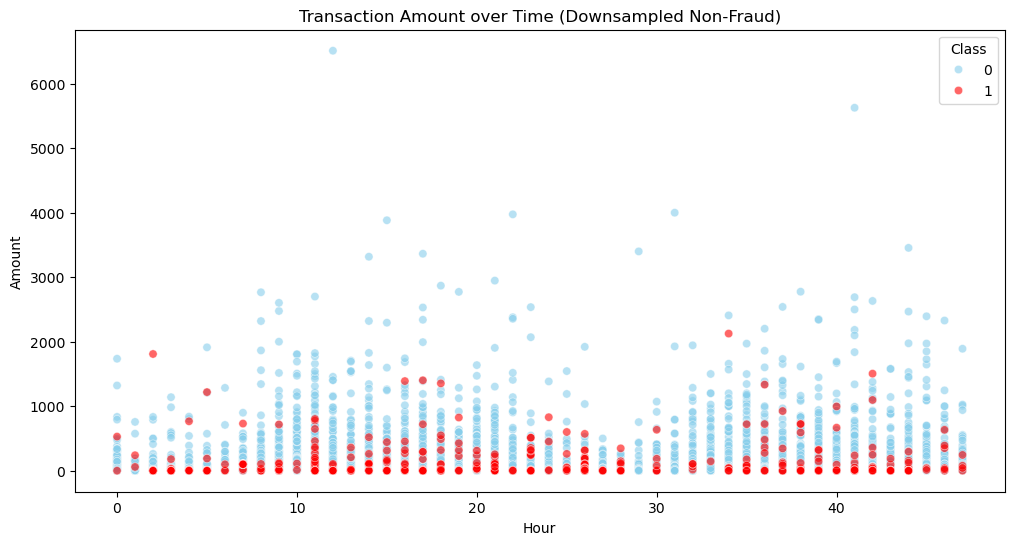

In [15]:
df_nf = df[df['Class'] == 0].sample(20000, random_state=42)
df_f = df[df['Class'] == 1]

df_plot = pd.concat([df_nf, df_f])
plt.figure(figsize=(12,6))
sns.scatterplot(x='Hour', y='Amount', data=df_plot,hue='Class', palette={0:'skyblue', 1:'red'}, alpha=0.6)
plt.title("Transaction Amount over Time (Downsampled Non-Fraud)")
plt.show()

By scaling the transaction amount range, extreme non-fraud amounts no longer dominate the visualization. This makes smaller fraudulent transactions visible and highlights temporal patterns (hour of transaction) and monetary behavior (transaction amount). Fraud is concentrated in low to mid-range amounts and occurs more frequently during night hours.

### 

In [16]:
hourly_stats = (df.groupby(['Hour','Class'])['Amount'].agg(['min','max','count','sum','median','mean', 'var']).reset_index())
hourly_stats.rename(columns = {'count': 'Transactions'}, inplace = True)
hourly_stats.head()

,Hour,Class,min,max,Transactions,sum,median,mean,var
0,0,0,0.0,7712.43,3961,256572.87,12.990,64.774772,45615.821201
1,0,1,0.0,529.00,2,529.00,264.500,264.500000,139920.500000
2,1,0,0.0,1769.69,2215,145806.76,22.820,65.826980,20053.615770
3,1,1,59.0,239.93,2,298.93,149.465,149.465000,16367.832450
4,2,0,0.0,4002.88,1555,106989.39,17.900,68.803466,45355.430437


### Transaction Amount Behavior Across Time (Hourly Stats)

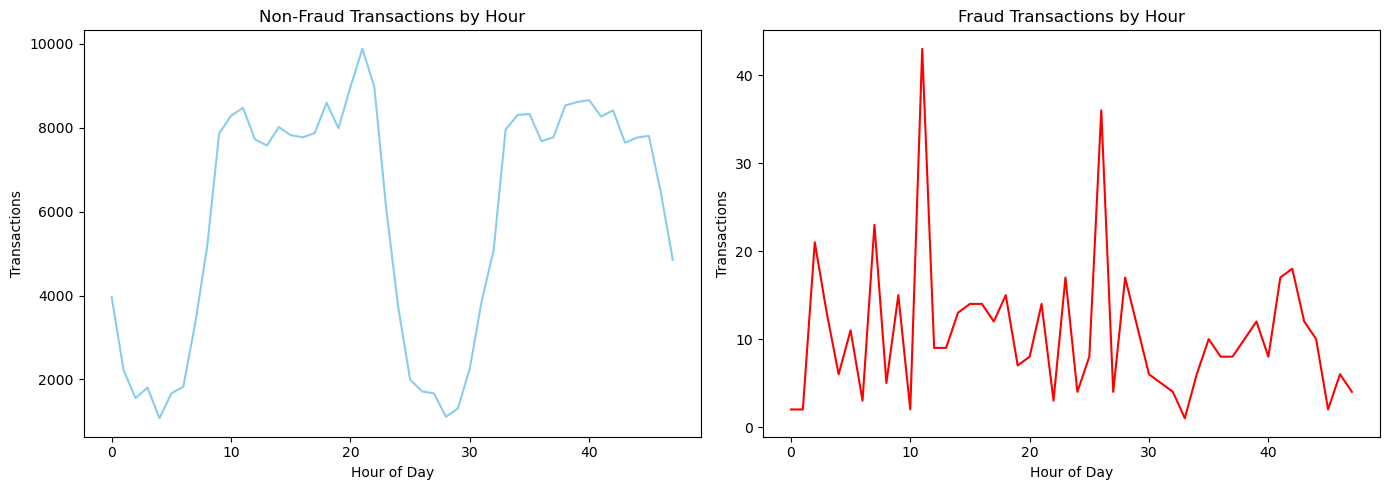

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='Transactions', ax=axes[0], color='skyblue')

axes[0].set_title('Non-Fraud Transactions by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Transactions')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='Transactions', ax=axes[1], color='red')
axes[1].set_title('Fraud Transactions by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Transactions')

plt.tight_layout()
plt.show()

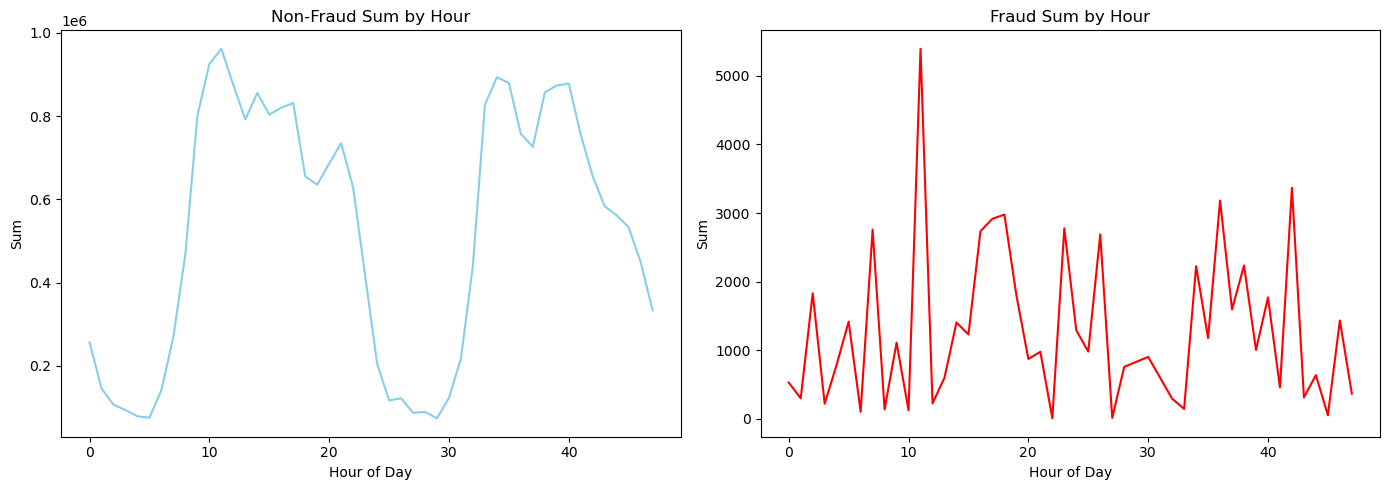

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='sum', ax=axes[0], color='skyblue')

axes[0].set_title('Non-Fraud Sum by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Sum')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='sum', ax=axes[1], color='red')
axes[1].set_title('Fraud Sum by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Sum')

plt.tight_layout()
plt.show()

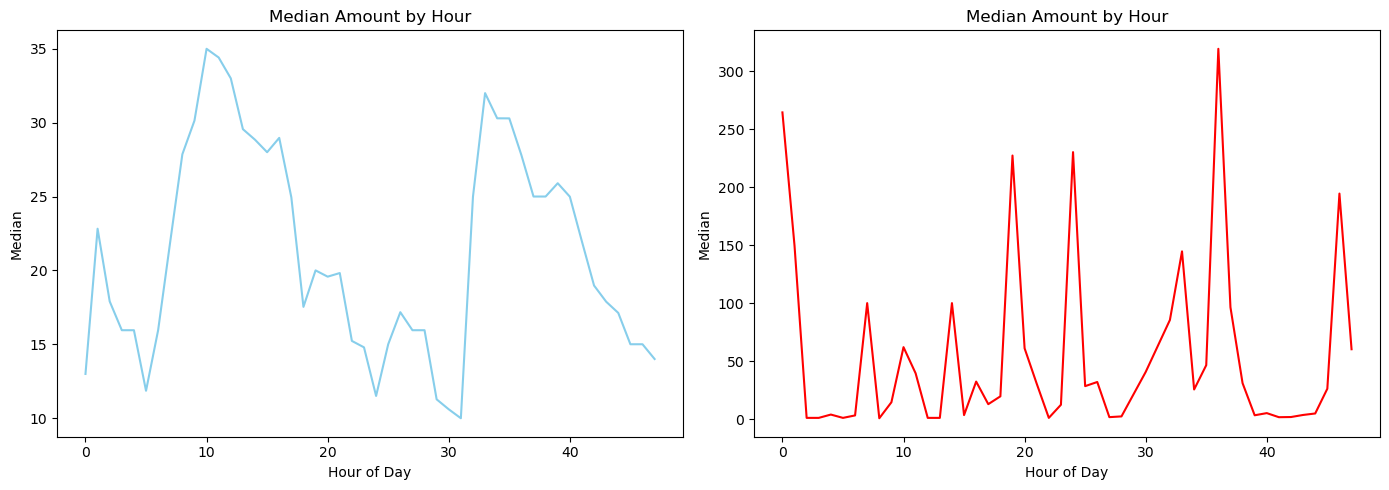

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='median', ax=axes[0], color='skyblue')
axes[0].set_title('Median Amount by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Median')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='median',ax=axes[1],color='red')
axes[1].set_title('Median Amount by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Median')

plt.tight_layout()
plt.show()

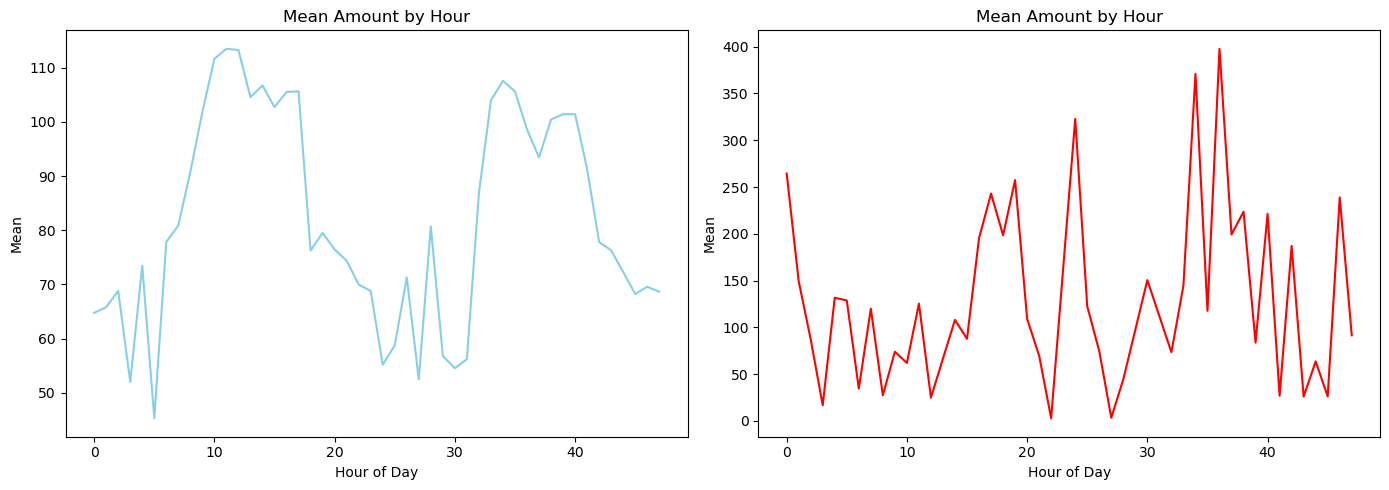

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='mean', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Amount by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Mean')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='mean',ax=axes[1],color='red')
axes[1].set_title('Mean Amount by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Mean')

plt.tight_layout()
plt.show()

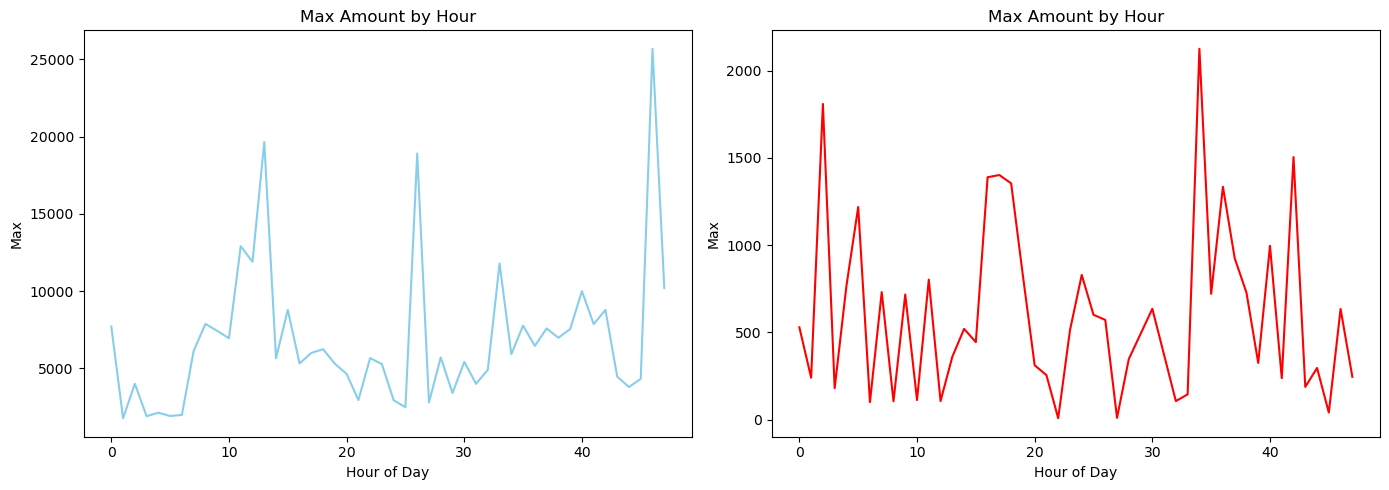

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='max', ax=axes[0], color='skyblue')
axes[0].set_title('Max Amount by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Max')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='max',ax=axes[1],color='red')
axes[1].set_title('Max Amount by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Max')

plt.tight_layout()
plt.show()

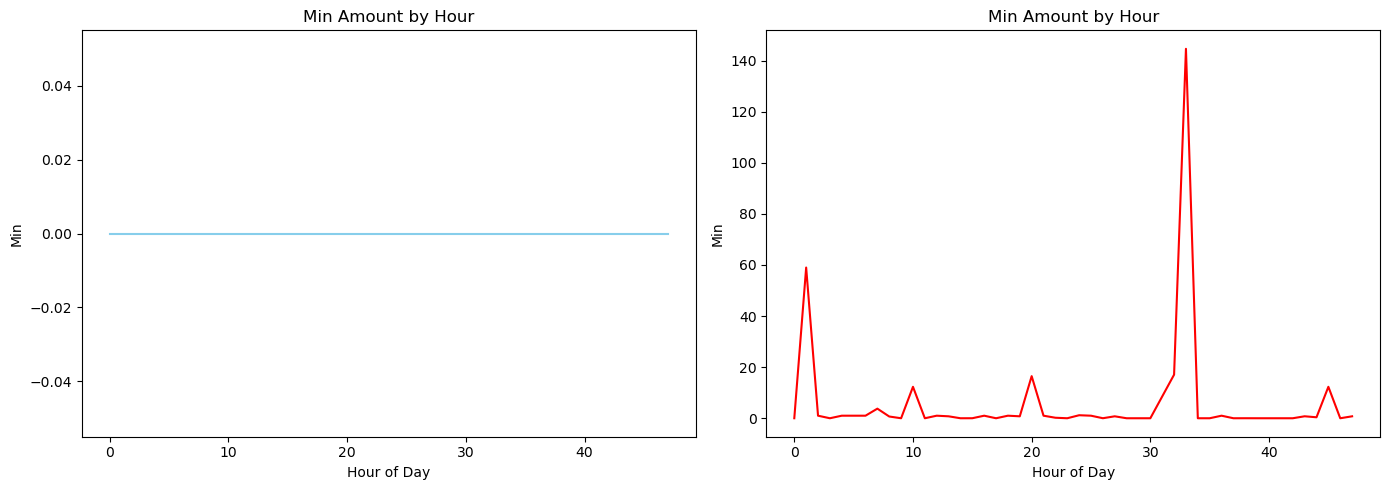

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)

# Non-fraud (Class 0)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 0], x='Hour', y='min', ax=axes[0], color='skyblue')
axes[0].set_title('Min Amount by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Min')

# Fraud (Class 1)
sns.lineplot(data=hourly_stats[hourly_stats['Class'] == 1], x='Hour', y='min',ax=axes[1],color='red')
axes[1].set_title('Min Amount by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Min')

plt.tight_layout()
plt.show()

### 

## Correlation Analysis 

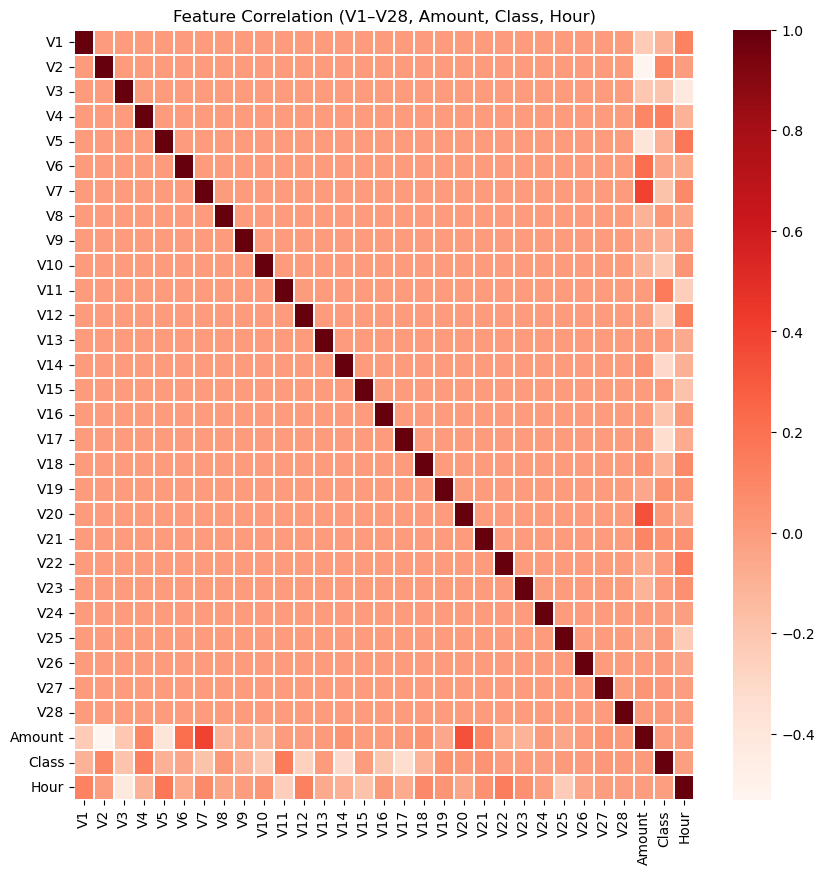

In [23]:
plt.figure(figsize=(10,10))
plt.title('Feature Correlation (V1–V28, Amount, Class, Hour)')
corr = df.corr()
sns.heatmap(corr, cmap='Reds', linewidths=0.1)
plt.show()

Because V1–V28 are PCA components, strong linear correlations between features are not expected. Nevertheless, correlations with external variables such as transaction amount and time can still appear. Here, amount is positively correlated with V7 and V20, negatively correlated with V2 and V5, and time shows a negative relationship with V3, indicating how monetary and temporal information is encoded within specific principal components.

##

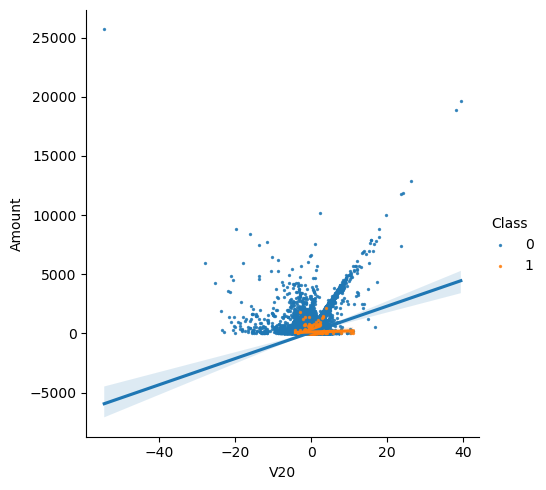

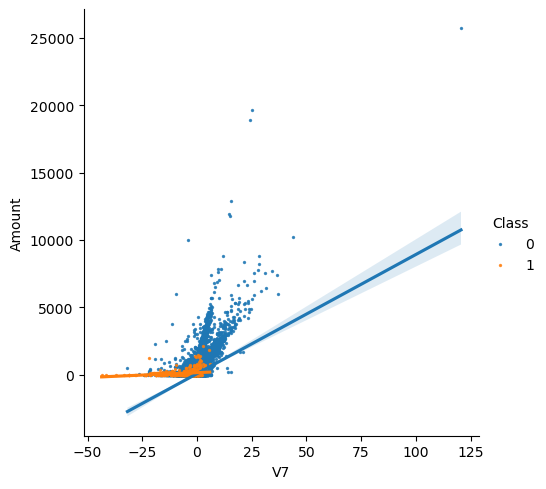

In [24]:
sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

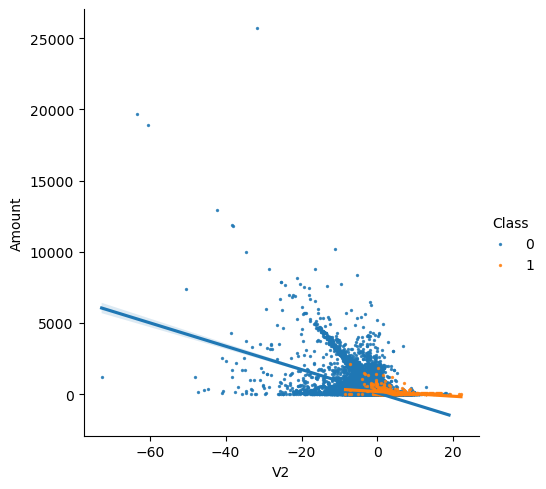

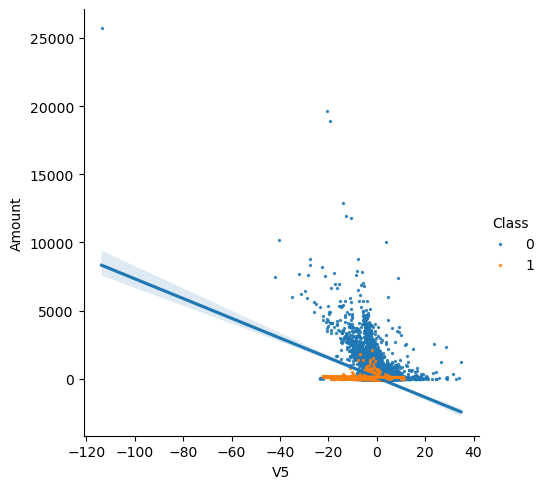

In [25]:
sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Linear regression plots reveal that V7 and V20 exhibit positive slopes with Amount, indicating increasing monetary values as these components increase, while V2 and V5 show negative slopes, suggesting an inverse relationship.

###

## Define Target and Features

### Target variable (y):

In [26]:
y = df['Class']
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

##

### Feature Matrix (X):

In [27]:
X = df.drop(columns=['Class'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour'],
      dtype='object')

###

### Train/Test Split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###

### Feature Scaling

In [30]:
scaler = StandardScaler()
X_train[['Amount', 'Hour']] = scaler.fit_transform(X_train[['Amount', 'Hour']])
X_test[['Amount', 'Hour']] = scaler.transform(X_test[['Amount', 'Hour']])

In [31]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494,1.375371
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764,0.616942
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693,-1.127446
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360,0.768628
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281,-0.748231


In [32]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,-0.003181,0.001924,0.001532,0.000079,-0.000698,0.004685,-0.000307,0.001736,-0.002807,0.001558,...,-0.001479,-0.001211,-0.000202,0.001109,0.002622,-0.000504,0.000282,-0.000615,0.003456,-0.007519
std,1.957791,1.660157,1.520112,1.415887,1.382965,1.336478,1.231741,1.205777,1.103746,1.099188,...,0.732772,0.725571,0.612490,0.606951,0.521444,0.483381,0.398388,0.342373,0.987933,0.999859
min,-37.558067,-42.172688,-32.454198,-5.263068,-40.427726,-19.996349,-31.197329,-50.688419,-9.481456,-22.187089,...,-22.757540,-8.887017,-26.751119,-2.822384,-7.495741,-1.855355,-9.845808,-8.412267,-0.351689,-1.961718
25%,-0.922012,-0.597742,-0.885412,-0.855101,-0.689776,-0.767032,-0.556383,-0.211144,-0.654460,-0.534021,...,-0.229432,-0.543363,-0.161485,-0.353306,-0.318244,-0.329162,-0.071348,-0.053144,-0.329753,-0.824074
50%,0.014539,0.069051,0.179703,-0.013487,-0.052099,-0.274488,0.039029,0.018431,-0.053372,-0.091538,...,-0.030054,0.007985,-0.011928,0.041618,0.018827,-0.053818,0.000895,0.011321,-0.263943,-0.217330
75%,1.315764,0.802856,1.029285,0.747315,0.615923,0.403490,0.570031,0.325590,0.593091,0.451679,...,0.186474,0.529293,0.147841,0.442355,0.354786,0.241305,0.090562,0.078955,-0.046451,0.920314
max,2.454930,17.930550,4.226108,12.132323,28.762671,23.917837,44.054461,18.282168,9.125535,13.811758,...,27.202839,8.272233,19.002942,4.022866,7.519589,3.116200,10.507884,22.620072,51.143302,1.602900


###

## Predictive Models 

## Logistic Regression 

In [33]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

## Prediction, probability and Evaluation

In [34]:
y_pred = lr.predict(X_test)

In [35]:
y_proba = lr.predict_proba(X_test)[:, 1]

In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[55477  1387]
 [    8    90]]


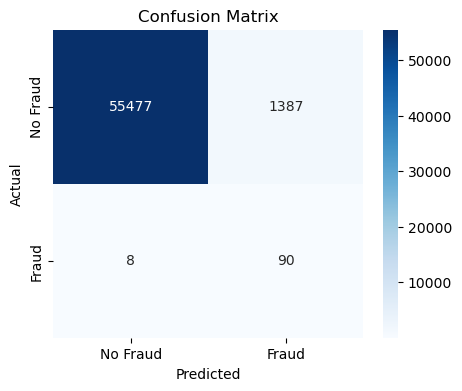

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## Precision-Recall curve

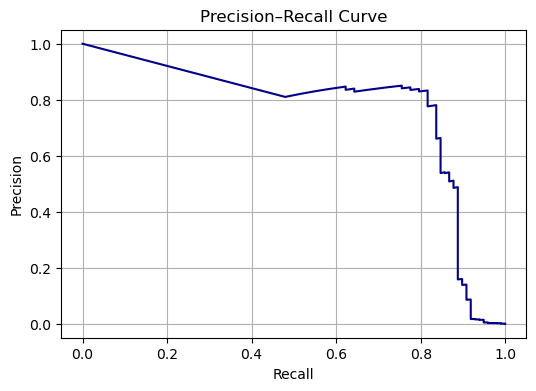

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color= 'darkblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid()
plt.show()

## Threshold Tuning

In [40]:
target_recall = 0.95

indices = np.where(recall >= target_recall)[0]

# Choose the threshold that gives the highest precision among these
best_idx = indices[np.argmax(precision[indices])]
best_threshold = thresholds[best_idx]
best_threshold

np.float64(0.07132542363410058)

In [41]:
y_pred_custom = (y_proba >= best_threshold).astype(int)

In [42]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"Confusion Matrix (Threshold = {best_threshold:.2f}):\n", cm_custom)

Confusion Matrix (Threshold = 0.07):
 [[42117 14747]
 [    4    94]]


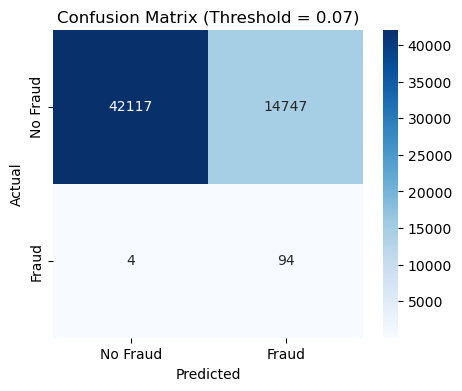

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud','Fraud'], yticklabels=['No Fraud','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.show()

## 

## RandomForestClassifier 

In [44]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight='balanced', random_state=42)

## Fit the Model 

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## Prediction, Probability and Evaluation 

In [46]:
y_pred = rf.predict(X_test)

In [47]:
y_proba = rf.predict_proba(X_test)[:,1]

In [48]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56861     3]
 [   27    71]]


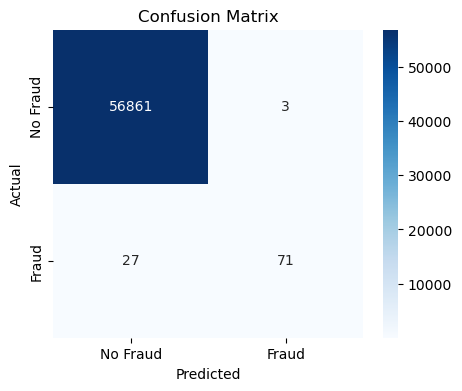

In [49]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.72      0.83        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Precision-Recall curve

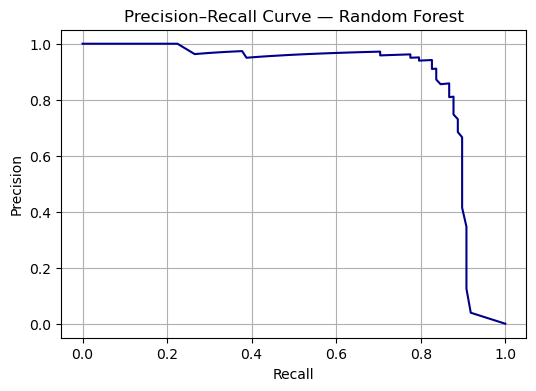

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color = 'darkblue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Random Forest")
plt.grid(True)
plt.show()

## Threshold Tuning

In [52]:
new_threshold = 0.07

In [53]:
y_pred_curated = (y_proba >= new_threshold).astype(int)

In [54]:
cm_curated = confusion_matrix(y_test, y_pred_curated)
print(f"Confusion Matrix (Threshold {new_threshold}):\n", cm_curated)

Confusion Matrix (Threshold 0.07):
 [[56824    40]
 [   11    87]]


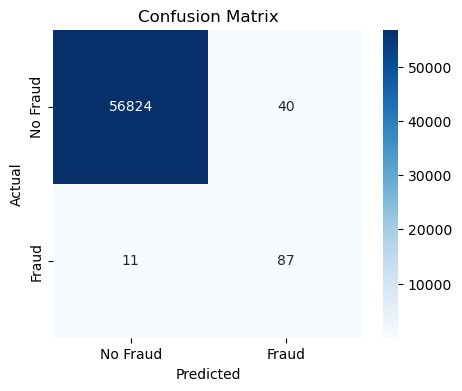

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_curated, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance 

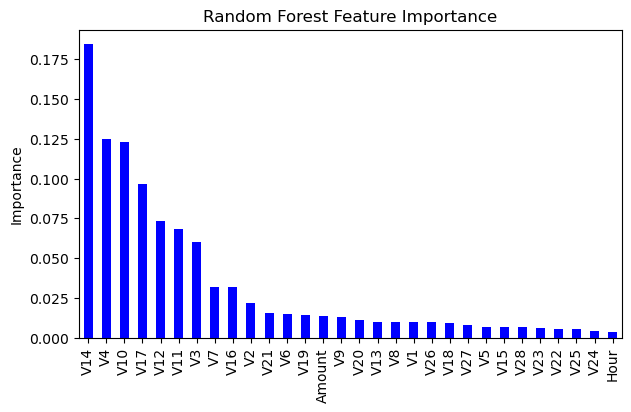

In [56]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(7,4))
feat_importances.plot(kind='bar', color='blue')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.show()

## 

## CatBoostClasiffier

## Fit the Model 

In [57]:
cat_model = CatBoostClassifier(
    iterations=1000,         # number of trees
    learning_rate=0.05,      # step size
    depth=6,                 # tree depth
    eval_metric='AUC',       # metric to monitor
    random_seed=42,
    verbose=100,             # log training every 100 iterations
    class_weights=[1, y.value_counts()[0]/y.value_counts()[1]] # handle imbalance
)

In [58]:
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.9448537	best: 0.9448537 (0)	total: 229ms	remaining: 3m 49s
100:	test: 0.9730356	best: 0.9738424 (94)	total: 10.8s	remaining: 1m 35s
200:	test: 0.9778505	best: 0.9780938 (197)	total: 16.1s	remaining: 1m 4s
300:	test: 0.9782571	best: 0.9790041 (271)	total: 21.1s	remaining: 49.1s
400:	test: 0.9773340	best: 0.9790041 (271)	total: 28.7s	remaining: 42.9s
500:	test: 0.9766891	best: 0.9790041 (271)	total: 35.1s	remaining: 34.9s
600:	test: 0.9766873	best: 0.9790041 (271)	total: 44.1s	remaining: 29.3s
700:	test: 0.9766852	best: 0.9790041 (271)	total: 50.1s	remaining: 21.4s
800:	test: 0.9766852	best: 0.9790041 (271)	total: 54.6s	remaining: 13.6s
900:	test: 0.9766852	best: 0.9790041 (271)	total: 58.8s	remaining: 6.46s
999:	test: 0.9766848	best: 0.9790041 (271)	total: 1m 3s	remaining: 0us

bestTest = 0.9790041474
bestIteration = 271

Shrink model to first 272 iterations.


## Prediction, Probability and Evaluation 

In [59]:
y_pred = cat_model.predict(X_test)

In [60]:
y_proba = cat_model.predict_proba(X_test)[:, 1]

In [61]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56819    45]
 [   13    85]]


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.87      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



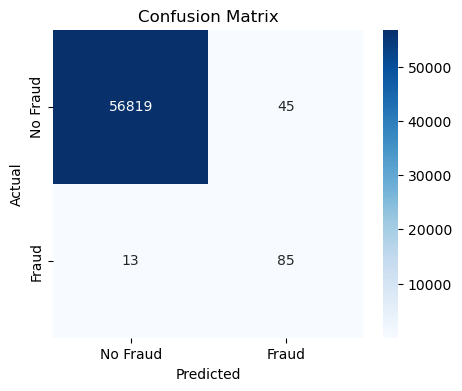

In [63]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Precision-Recall curve

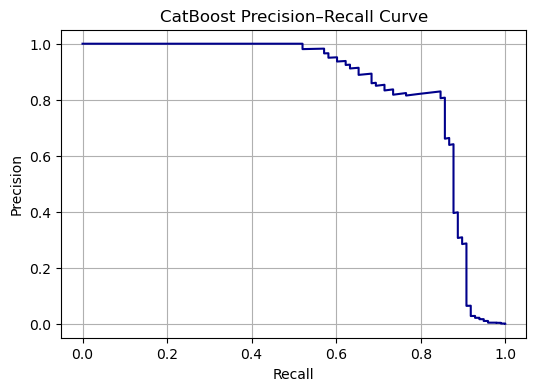

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='darkblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision–Recall Curve')
plt.grid()
plt.show()

## Threshold Tuning

In [65]:
new_threshold = 0.07

In [66]:
y_pred_custom = (y_proba >= new_threshold).astype(int)

In [67]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f'Confusion Matrix (Threshold = {new_threshold:}):\n', cm_custom)

Confusion Matrix (Threshold = 0.07):
 [[56429   435]
 [    9    89]]


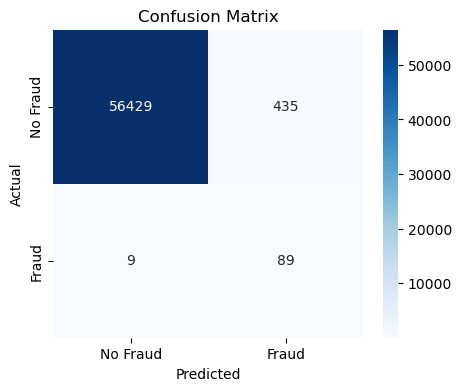

In [68]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

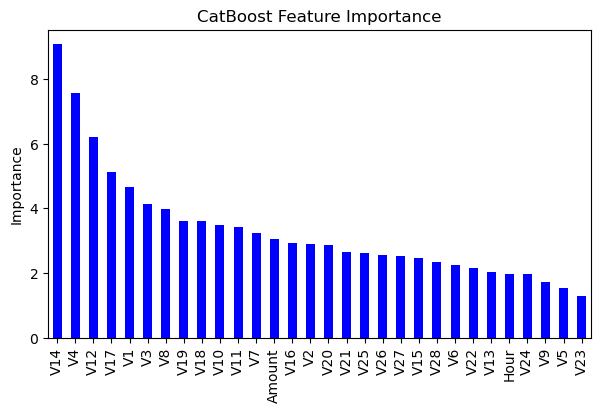

In [69]:
feat_importances = pd.Series(cat_model.get_feature_importance(), index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(7,4))
feat_importances.plot(kind='bar', color='blue')
plt.title('CatBoost Feature Importance')
plt.ylabel('Importance')
plt.show()

##

## XGBoost

## LightGMB

## Fit the Model 

In [70]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary',
    random_state=42,
    n_jobs=-1)

In [71]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7444
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
               n_jobs=-1, objective='binary', random_state=42, subsample=0.8)

## Prediction, Probability and Evaluation 

In [72]:
y_pred = lgb_model.predict(X_test)

In [73]:
y_proba = lgb_model.predict_proba(X_test)[:, 1]

In [74]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56669   195]
 [   25    73]]


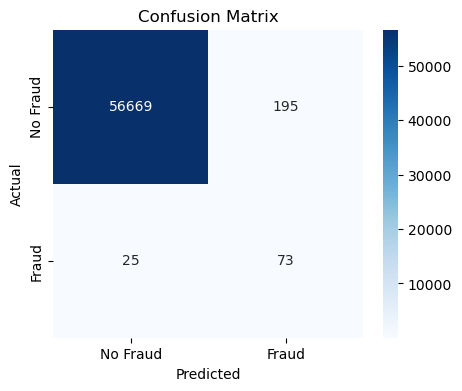

In [75]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.74      0.40        98

    accuracy                           1.00     56962
   macro avg       0.64      0.87      0.70     56962
weighted avg       1.00      1.00      1.00     56962



## Threshold Tuning

In [77]:
threshold = 0.07
y_pred_custom = (y_proba >= threshold).astype(int)

In [78]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"Confusion Matrix (Threshold = {threshold}):\n", cm_custom)

Confusion Matrix (Threshold = 0.07):
 [[56644   220]
 [   25    73]]


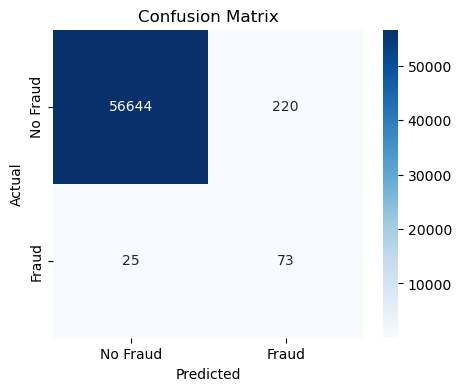

In [79]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.74      0.37        98

    accuracy                           1.00     56962
   macro avg       0.62      0.87      0.69     56962
weighted avg       1.00      1.00      1.00     56962



## Precision-Recall curve

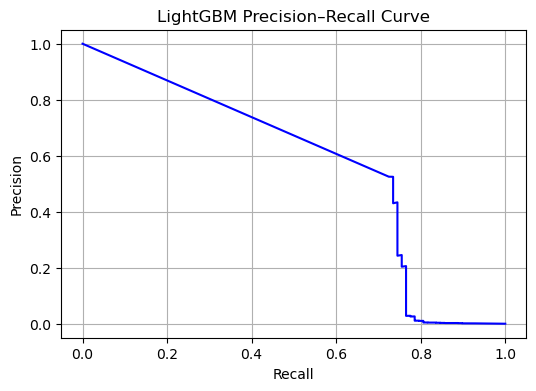

In [81]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision–Recall Curve')
plt.grid()
plt.show()

## Feature Importance 

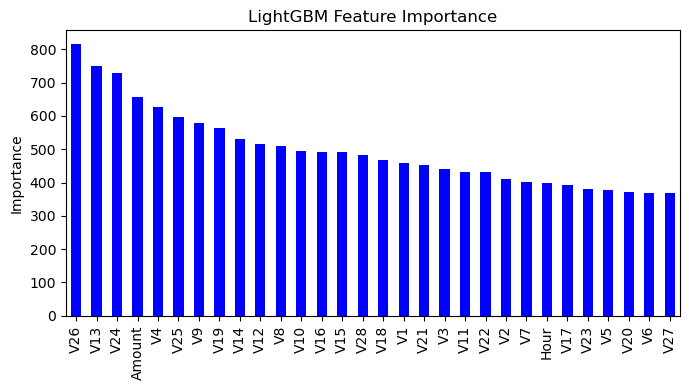

In [82]:
feat_imp = pd.Series(lgb_model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(7,4))
feat_imp.plot(kind='bar', color='blue')
plt.title('LightGBM Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()